# Modelo 1 Tabela Stress

## importações

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
from plotly import __version__
from plotly.offline import download_plotlyjs, plot, iplot, init_notebook_mode
import plotly.express as px
init_notebook_mode(connected=True)
import cufflinks as cf
cf.go_offline()

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
from sklearn.model_selection import cross_val_score

## Leitura do CSV e informações da tabela

In [32]:
data = pd.read_csv("..\\assets\\data\\Student Stress Factors.csv")

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Sleep Quality                        520 non-null    int64
 1   suffer headaches                     520 non-null    int64
 2   academic performance                 520 non-null    int64
 3   study load                           520 non-null    int64
 4   practice extracurricular activities  520 non-null    int64
 5   stress levels                        520 non-null    int64
dtypes: int64(6)
memory usage: 24.5 KB


In [34]:
data.head()

,Sleep Quality,suffer headaches,academic performance,study load,practice extracurricular activities,stress levels
0,3,1,3,4,2,3
1,4,1,2,3,3,2
2,2,1,2,1,4,4
3,3,2,3,2,3,3
4,2,3,1,5,5,3


In [35]:
data.columns

Index(['Sleep Quality', 'suffer headaches', 'academic performance',
       'study load', 'practice extracurricular activities', 'stress levels'],
      dtype='object')

In [36]:
#sns.pairplot(data, hue='academic performance')

## Codigo

### New dataframe

In [37]:
scaler = StandardScaler()
scaler.fit(data.drop('academic performance', axis=1))
df_normalizado = scaler.transform(data.drop('academic performance', axis=1))
df_param = pd.DataFrame(df_normalizado, columns=data.drop('academic performance', axis=1).columns)

### KNN

In [38]:
X_train, X_test, y_train, y_test = train_test_split(df_param, data['academic performance'], test_size=0.25, random_state=1)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


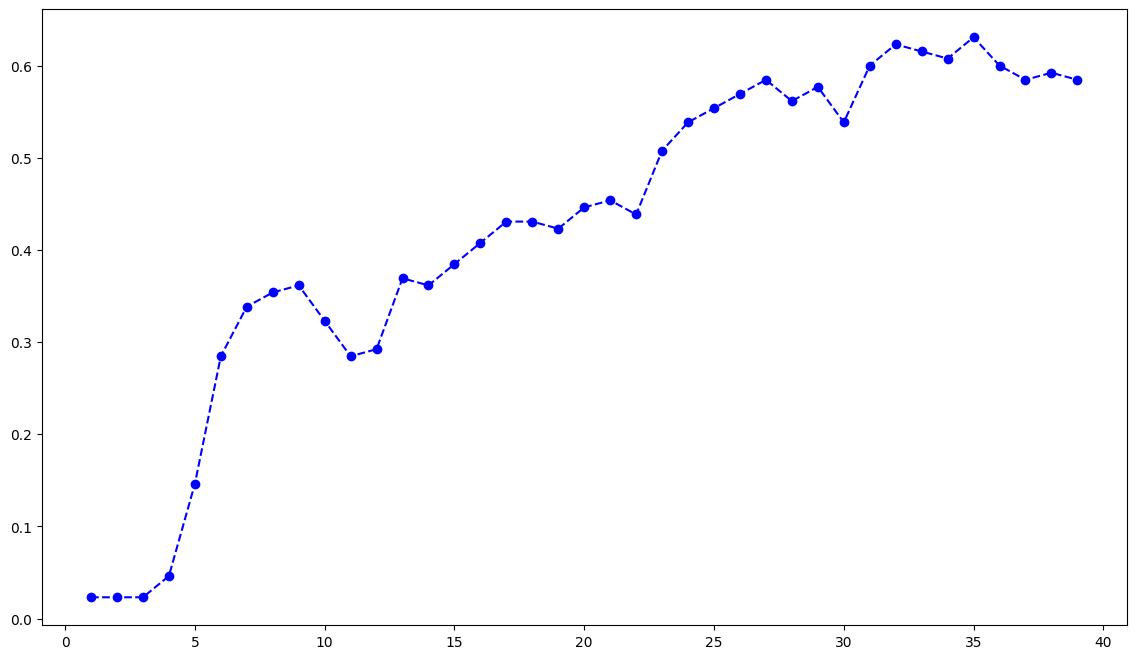

In [39]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))
plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate, color='blue', linestyle='dashed', marker='o')

In [40]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
print(classification_report(y_test,pred))
print('\n')
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        13
           3       0.95      0.98      0.97        43
           4       0.98      1.00      0.99        45
           5       1.00      0.89      0.94        19

    accuracy                           0.98       130
   macro avg       0.99      0.97      0.98       130
weighted avg       0.98      0.98      0.98       130



[[10  0  0  0  0]
 [ 0 13  0  0  0]
 [ 0  0 42  1  0]
 [ 0  0  0 45  0]
 [ 0  0  2  0 17]]


In [41]:
scores = cross_val_score(knn, data, data['academic performance'], cv=5, scoring='accuracy')

print(scores,"\n")

# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[1. 1. 1. 1. 1.] 

Accuracy: 1.00 (+/- 0.00)


### Grafico

# Modelo 1 Tabela Performace

## Leitura do CSV e importações

In [42]:
data2 = pd.read_csv("..\\assets\\data\\performance_data_Index_convertido_por_faixas.csv")

In [43]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Extracurricular Activities        10000 non-null  int64
 3   Sleep Hours                       10000 non-null  int64
 4   Sample Question Papers Practiced  10000 non-null  int64
 5   Performance Index                 10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


In [44]:
data2.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,5
1,4,82,0,4,2,4
2,8,51,1,7,2,3
3,5,52,1,5,2,2
4,7,75,0,8,5,4


In [45]:
data2.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

## Codigo

### New DataFrame

In [46]:
scaler2 = StandardScaler()
scaler2.fit(data2.drop('Performance Index', axis=1))
df2_normalizado = scaler2.transform(data2.drop('Performance Index', axis=1))
df2_param = pd.DataFrame(df2_normalizado, columns=data2.drop('Performance Index', axis=1).columns)

### KNN

In [47]:
X2_train, X2_test, y2_train, y2_test = train_test_split(df2_param, data2['Performance Index'], test_size=0.20, random_state= 20)
knn2 = KNeighborsClassifier(n_neighbors=1)
knn2.fit(X2_train, y2_train)
pred2 = knn2.predict(X2_test)
print(classification_report(y2_test,pred2))
print('\n')
print(confusion_matrix(y2_test,pred2))

              precision    recall  f1-score   support

           1       0.72      0.71      0.71        51
           2       0.84      0.84      0.84       463
           3       0.83      0.84      0.84       686
           4       0.85      0.85      0.85       583
           5       0.85      0.82      0.84       217

    accuracy                           0.84      2000
   macro avg       0.82      0.81      0.81      2000
weighted avg       0.84      0.84      0.84      2000



[[ 36  15   0   0   0]
 [ 14 387  62   0   0]
 [  0  61 576  49   0]
 [  0   0  53 498  32]
 [  0   0   0  38 179]]


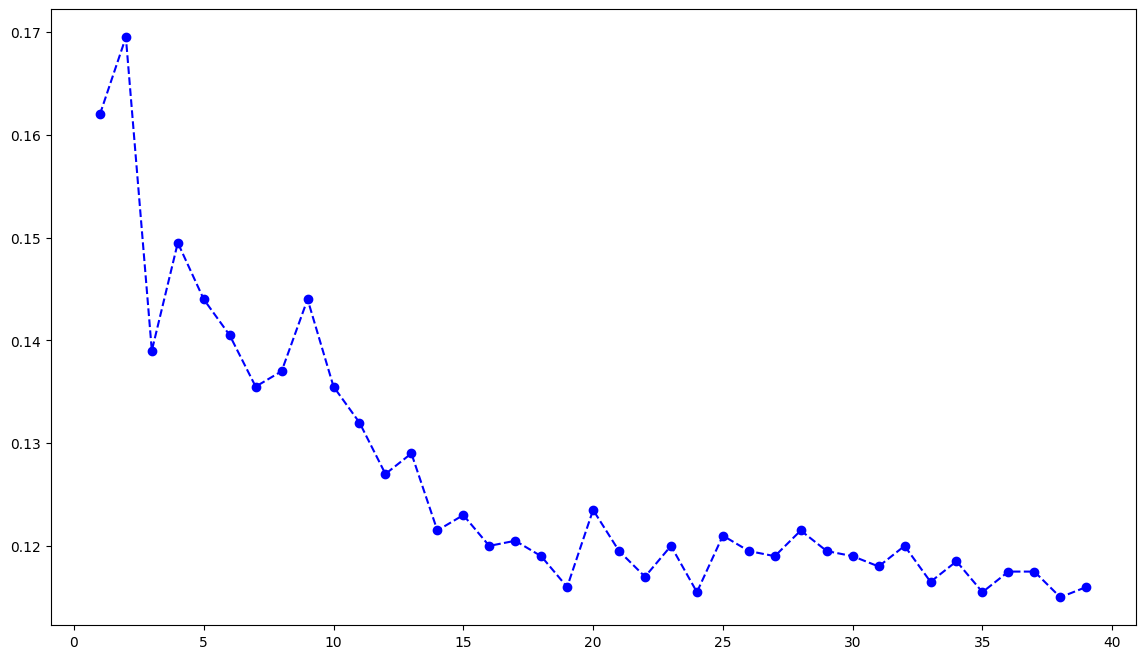

In [48]:
error_rate2 = []

for i in range(1,40):
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train, y2_train)
    pred2 = knn2.predict(X2_test)
    error_rate2.append(np.mean(pred2!=y2_test))

plt.figure(figsize=(14,8))
plt.plot(range(1,40), error_rate2, color='blue', linestyle='dashed', marker='o')

In [49]:
knn2 = KNeighborsClassifier(n_neighbors=38)
knn2.fit(X2_train, y2_train)
pred2 = knn2.predict(X2_test)
print(classification_report(y2_test,pred2))
print('\n')
print(confusion_matrix(y2_test,pred2))

              precision    recall  f1-score   support

           1       1.00      0.12      0.21        51
           2       0.86      0.91      0.88       463
           3       0.89      0.93      0.91       686
           4       0.88      0.93      0.90       583
           5       0.96      0.76      0.85       217

    accuracy                           0.89      2000
   macro avg       0.92      0.73      0.75      2000
weighted avg       0.89      0.89      0.88      2000



[[  6  45   0   0   0]
 [  0 420  43   0   0]
 [  0  26 635  25   0]
 [  0   0  33 544   6]
 [  0   0   0  52 165]]


In [50]:
scores = cross_val_score(knn2, data2, data2['Performance Index'], cv=5, scoring='accuracy')

print(scores,"\n")

# Results
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.9265 0.949  0.942  0.929  0.929 ] 

Accuracy: 0.94 (+/- 0.02)


### Gráfico

In [51]:
fig = px.scatter(
    X2_test, y=pred2,
    color=pred2, color_continuous_scale='RdBu',
    symbol=y2_test, symbol_map={1: 'square', 2: 'circle', 3:'diamond', 4:'triangle-up', 5:'cross'},
    labels={'symbol': 'label', 'color': 'score'}
)
fig.update_traces(marker_size=8, marker_line_width=1.5)
fig.update_layout(legend_orientation='h')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed